# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        # 可以跟原本的資料作比對， NAME_CONTRACT_TYPE、FLAG_OWN_CAR、FLAG_OWN_REALTY 有改變資料內容
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            print("the col name is===>" + col)
            app_train[col] = le.fit_transform(app_train[col])                       
print(app_train.shape)
app_train.head()

the col name is===>NAME_CONTRACT_TYPE
the col name is===>FLAG_OWN_CAR
the col name is===>FLAG_OWN_REALTY
(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#分析 app_train['DAYS_EMPLOYED'] 的資料分配
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [33]:
#統計 app_train['DAYS_EMPLOYED'] 資料分佈數量
app_train.groupby(['DAYS_EMPLOYED']).size()

DAYS_EMPLOYED
-17912         1
-17583         1
-17546         1
-17531         1
-17522         1
-17170         1
-17139         1
-16852         1
-16849         1
-16836         1
-16767         1
-16678         1
-16651         1
-16632         1
-16607         1
-16554         1
-16538         1
-16499         1
-16495         2
-16492         1
-16481         1
-16452         1
-16429         1
-16424         1
-16375         1
-16365         1
-16364         1
-16360         1
-16358         1
-16352         1
           ...  
-28            4
-27            2
-26            7
-25            3
-24            3
-23            1
-22            2
-21            2
-20            3
-19            3
-18            3
-17            5
-16            7
-15            6
-14            3
-13            3
-12            6
-11            2
-10            1
-9             3
-8             2
-7             1
-6             2
-5             1
-4             4
-3             3
-2             2


In [7]:
app_train['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [8]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [9]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [10]:
app_train['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [11]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [12]:
#列出目標 (TARGET) 與所有欄位之間相關係數，數值最大前 15 個
app_train.corr()['TARGET'].sort_values(ascending=False)[:15]

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64

In [13]:
#列出目標 (TARGET) 與所有欄位之間相關係數，數值最小前 15 個
#app_train.corr()['TARGET'].sort_values()[:15]
app_train.corr()['TARGET'].sort_values(ascending=True).head(15)

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
Name: TARGET, dtype: float64

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64
----------------------------------------------------


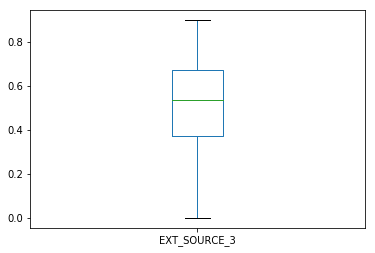

In [14]:
print(app_train['EXT_SOURCE_3'].describe())
print("----------------------------------------------------")
app_train['EXT_SOURCE_3'].plot.box()

In [15]:
print(app_train.groupby(['EXT_SOURCE_3']).size().sort_values(ascending=False))

EXT_SOURCE_3
0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
0.581484    1141
0.689479    1138
0.595456    1136
0.554947    1132
0.621226    1109
0.657784    1092
0.607557    1067
0.643026    1066
0.450747    1064
0.626304    1054
0.673830    1030
0.651260    1029
0.511892    1026
0.706205     992
0.553165     984
0.593718     978
0.634706     969
0.740799     961
0.681706     959
0.565608     956
0.728141     953
0.771362     947
0.576209     943
0.586740     942
0.656158     931
            ... 
0.020455       1
0.011346       1
0.012716       1
0.013948       1
0.014148       1
0.016541       1
0.014556       1
0.020311       1
0.887664       1
0.021492       1
0.029079       1
0.879506       1
0.872456       1
0.864212       1
0.858178       1
0.849170       1
0.844493       1
0.043227       1
0.029283       1
0.028674       1
0.021951       1
0.028275       1
0.026921       1
0.025272       1
0.024919       1
0.024227       1
0.024057       1
0

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
----------------------------------------------------


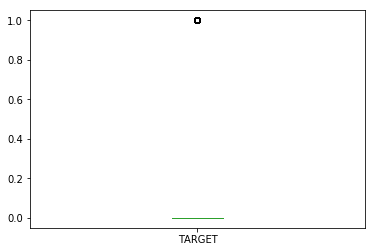

In [16]:
print(app_train['TARGET'].describe())
print("----------------------------------------------------")
app_train['TARGET'].plot.box()

In [17]:
print(app_train.groupby(['TARGET']).size().sort_values(ascending=False))

TARGET
0    282686
1     24825
dtype: int64


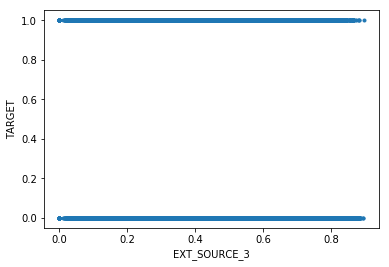

In [18]:
# 如果直接畫散布圖 - 看不出任何趨勢或形態
plt.plot(app_train['EXT_SOURCE_3'] ,app_train['TARGET'] , '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')
plt.show()

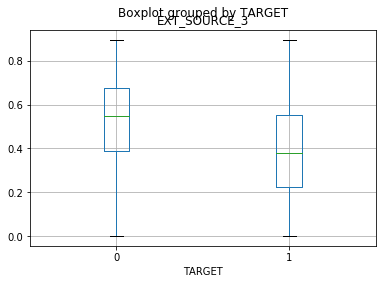

In [19]:
#轉換成boxplot
app_train.boxplot(column='EXT_SOURCE_3',by='TARGET' )
plt.show()

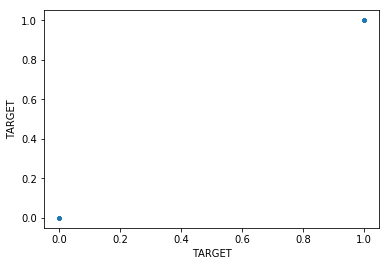

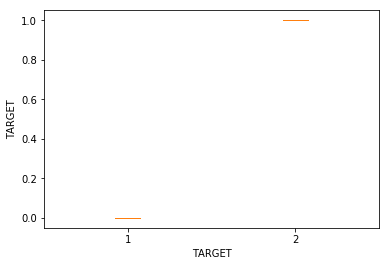

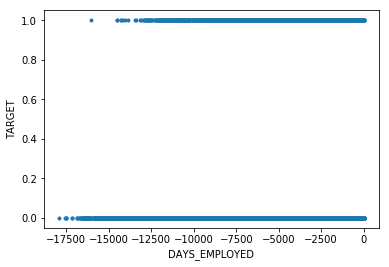

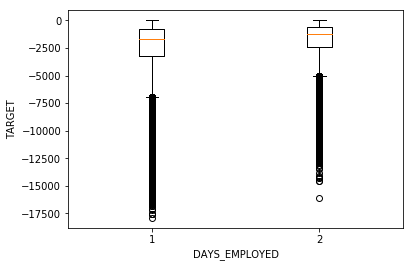

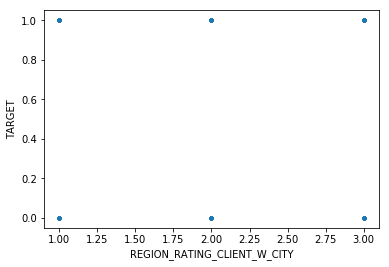

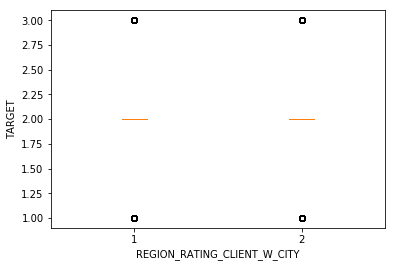

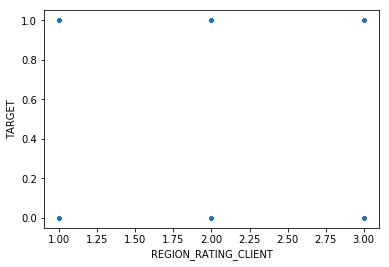

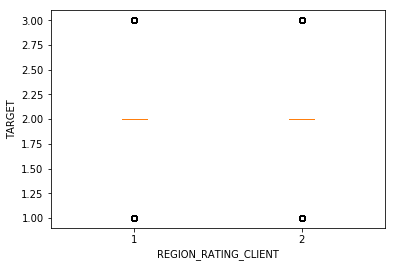

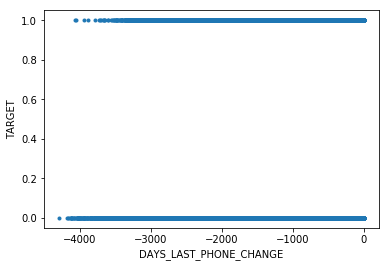

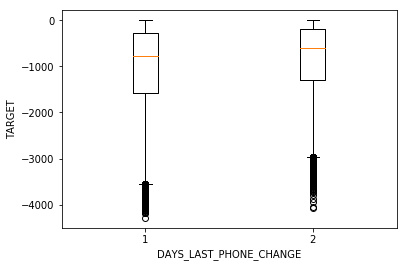

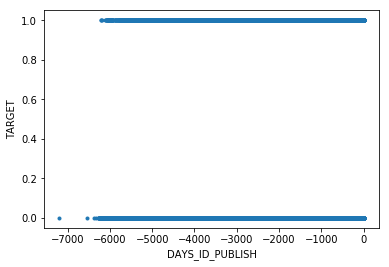

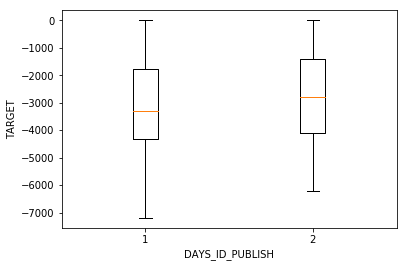

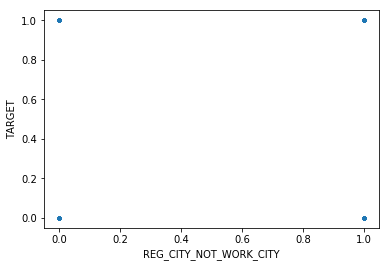

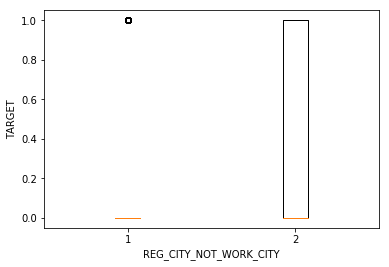

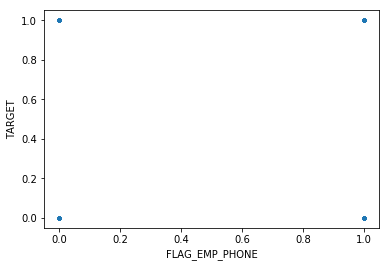

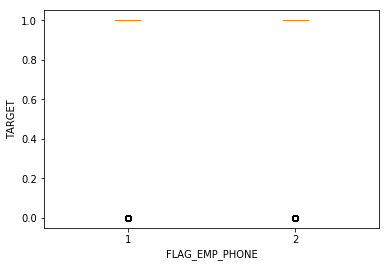

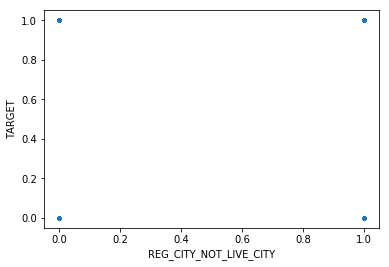

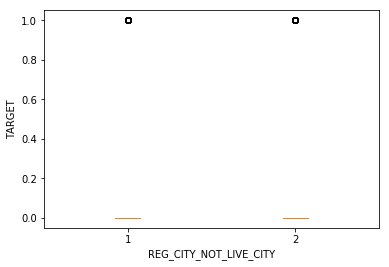

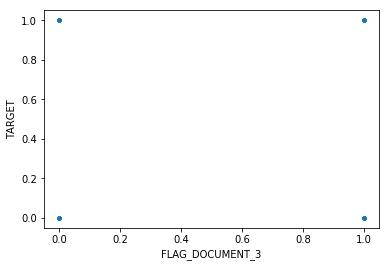

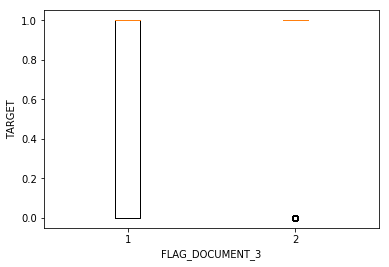

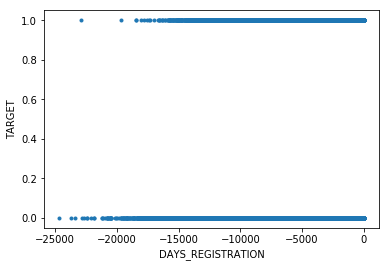

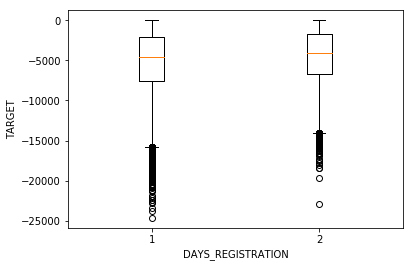

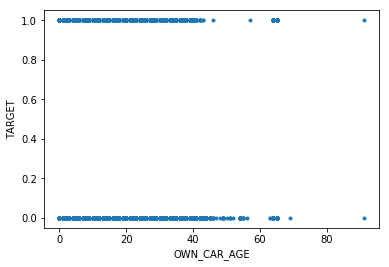

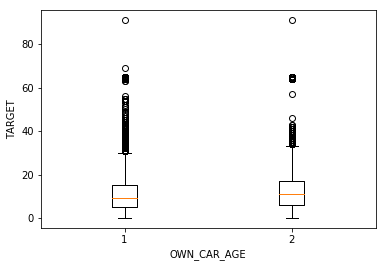

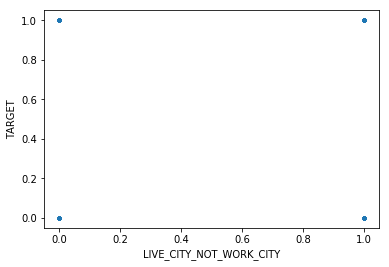

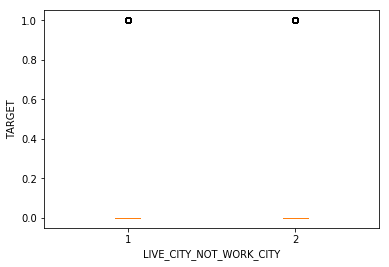

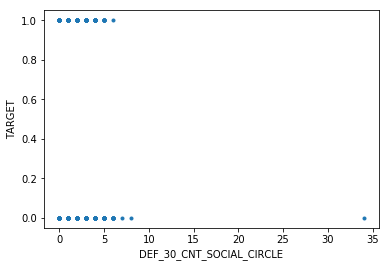

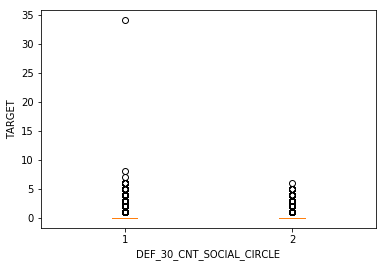

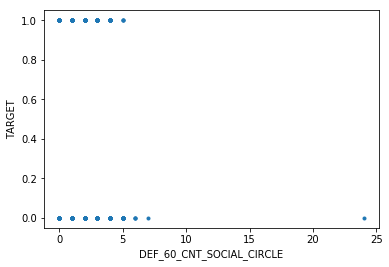

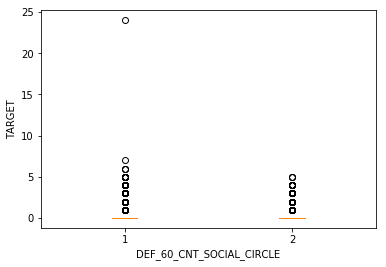

In [20]:
df_top15=app_train.corr()['TARGET'].sort_values(ascending=False)[:15];
for i in range(len(df_top15)):
    #plt.subplot(2,15,i+1)
    plt.plot(app_train[df_top15.index[i]], app_train['TARGET'], '.')
    plt.xlabel(df_top15.index[i])
    plt.ylabel('TARGET')
    plt.show()
    corr = np.corrcoef(app_train[df_top15.index[i]], app_train['TARGET'])
    #print("Correlation: %.4f" % (corr[0][1]))
    compare_data = [app_train[app_train['TARGET']==0][df_top15.index[i]].dropna().values,
                    app_train[app_train['TARGET']==1][df_top15.index[i]].dropna().values ]
    #plt.subplot(2,15,i+2)
    plt.boxplot(compare_data,notch=False,sym='o')
    plt.xlabel(df_top15.index[i])
    plt.ylabel('TARGET')
    plt.show()

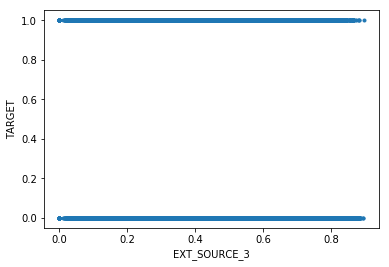

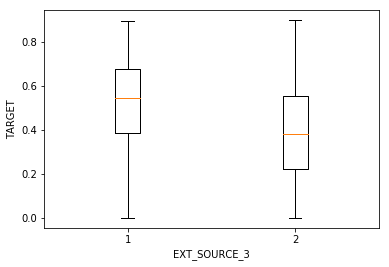

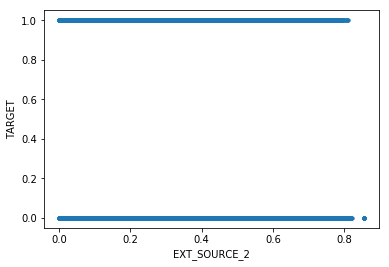

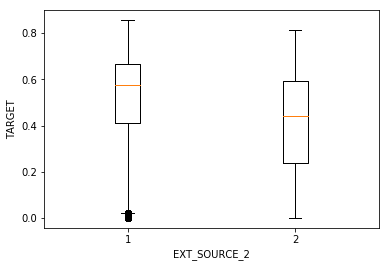

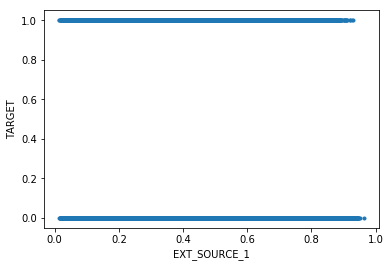

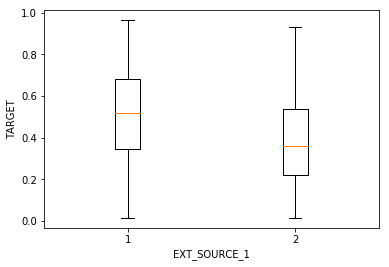

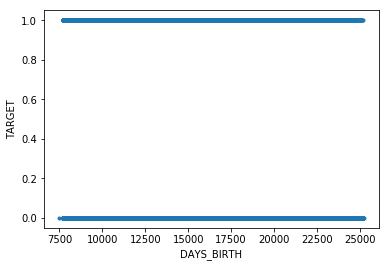

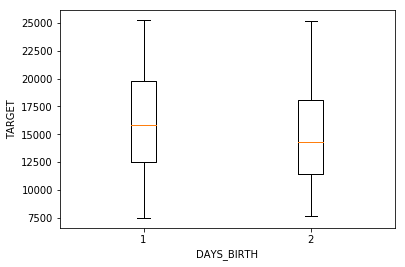

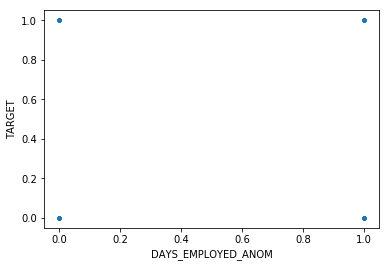

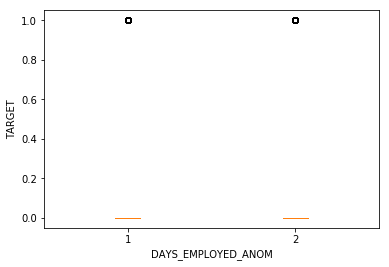

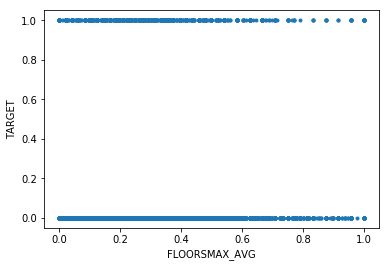

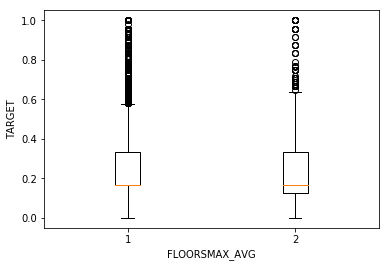

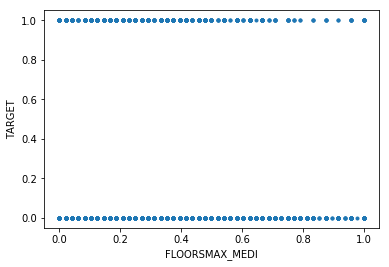

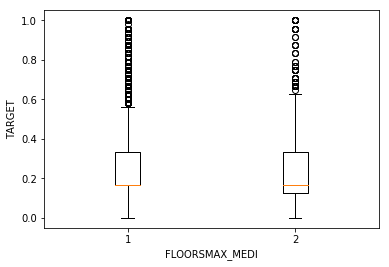

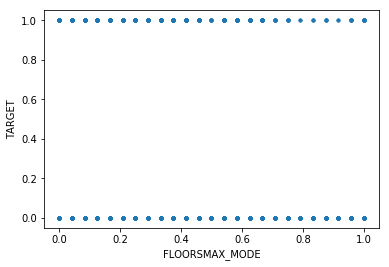

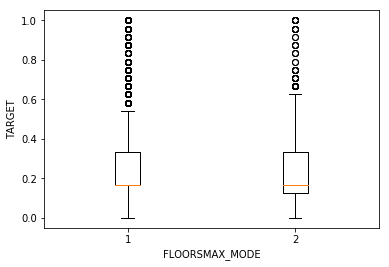

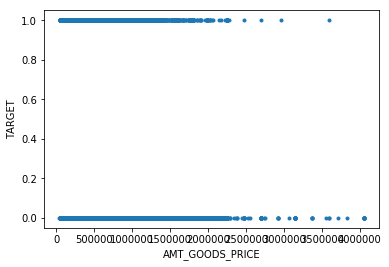

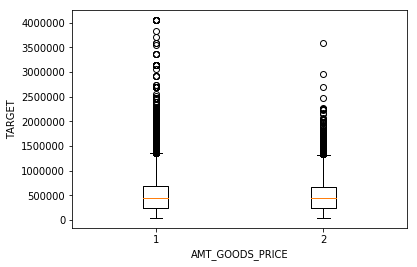

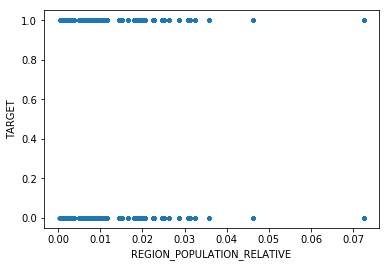

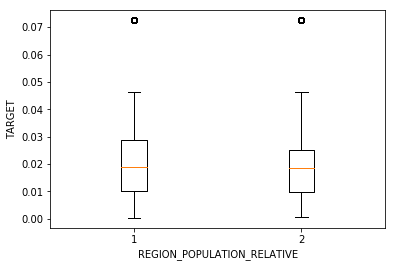

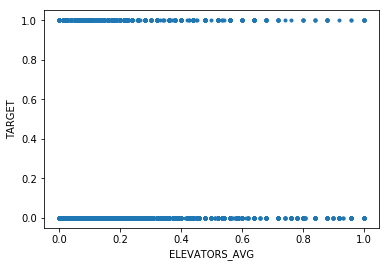

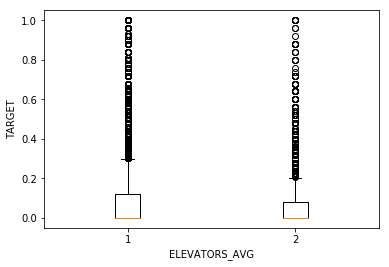

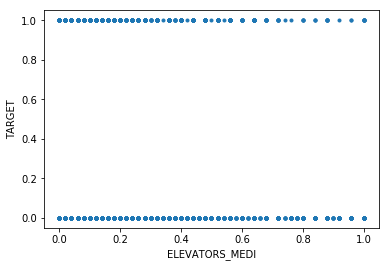

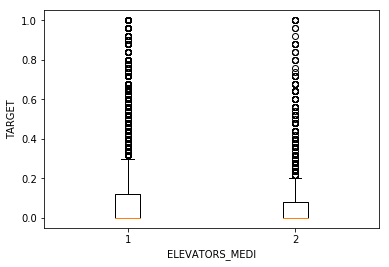

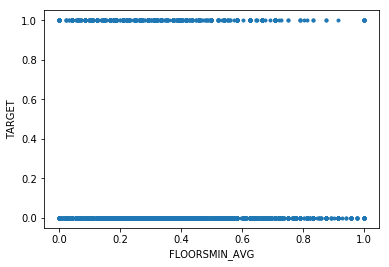

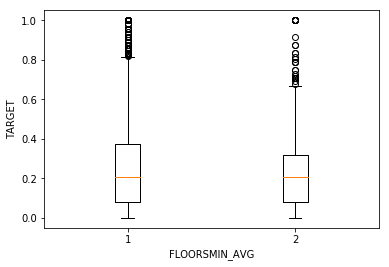

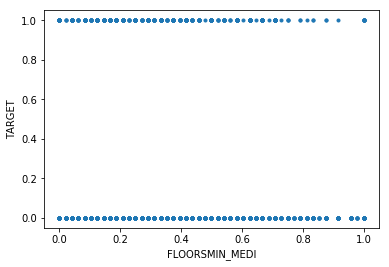

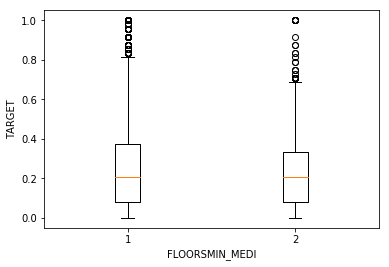

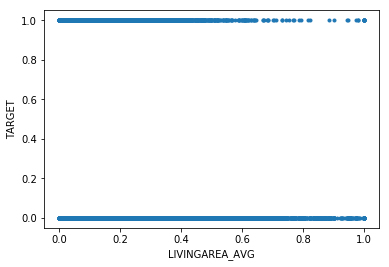

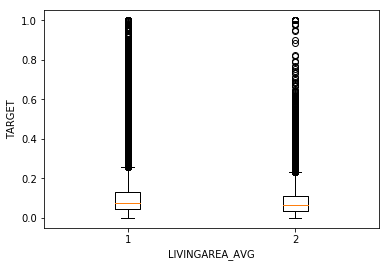

In [21]:
df_low15 = app_train.corr()['TARGET'].sort_values(ascending=True).head(15)

for i in range(len(df_low15)):
    #plt.subplot(2,15,i+1)
    plt.plot(app_train[df_low15.index[i]], app_train['TARGET'], '.')
    plt.xlabel(df_low15.index[i])
    plt.ylabel('TARGET')
    plt.show()
    corr = np.corrcoef(app_train[df_low15.index[i]], app_train['TARGET'])
    #print("Correlation: %.4f" % (corr[0][1]))
    compare_data = [app_train[app_train['TARGET']==0][df_low15.index[i]].dropna().values,
                    app_train[app_train['TARGET']==1][df_low15.index[i]].dropna().values ]
    #plt.subplot(2,15,i+2)
    plt.boxplot(compare_data,notch=False,sym='o')
    plt.xlabel(df_low15.index[i])
    plt.ylabel('TARGET')
    plt.show()